In [123]:
import pandas as pd
import numpy as np

data = pd.read_csv('NSQ_OneYear100test_Sept21.csv', 
                   usecols=['Local_Date_Time','RIC','Open','High','Low','Close','VWAP','NumberOfTrades','Volume'],
                   dtype={'Local_Date_Time': str,
                          'RIC': str, 
                          'Open': np.float64,
                          'High': np.float64,
                          'Low': np.float64,
                          'Close': np.float64,
                          'VWAP': np.float64,
                          'NumberOfTrades': int,
                          'Volume': int},
                   skipinitialspace=True,
                   parse_dates=True)

In [124]:
data['Diff_HL'] = data['High'] - data['Low']
data['Diff_Close'] = data['Close'].diff()

In [125]:
data

,Local_Date_Time,RIC,Open,High,Low,Close,VWAP,NumberOfTrades,Volume,Diff_HL,Diff_Close
0,2020-09-01 09:30:00,AAPL.O,132.76,132.92,131.49,131.6700,132.656,7032,5143217,1.43,NaN
1,2020-09-01 09:31:00,AAPL.O,131.71,132.00,131.32,131.6852,131.696,4657,1089138,0.68,0.0152
2,2020-09-01 09:32:00,AAPL.O,131.66,132.00,131.13,131.8100,131.554,4668,1062337,0.87,0.1248
3,2020-09-01 09:33:00,AAPL.O,131.81,131.83,130.81,130.9047,131.158,5074,1147498,1.02,-0.9053
4,2020-09-01 09:34:00,AAPL.O,130.91,131.39,130.89,131.3300,131.134,4179,915152,0.50,0.4253
...,...,...,...,...,...,...,...,...,...,...,...
9509788,2021-09-01 15:55:00,ZM.O,291.00,291.08,290.89,290.9300,290.973,257,33071,0.19,-0.0100
9509789,2021-09-01 15:56:00,ZM.O,290.92,290.98,290.83,290.8975,290.903,179,22543,0.15,-0.0325
9509790,2021-09-01 15:57:00,ZM.O,290.85,290.92,290.80,290.8200,290.851,275,42320,0.12,-0.0775
9509791,2021-09-01 15:58:00,ZM.O,290.82,290.91,290.71,290.8000,290.807,359,42121,0.20,-0.0200


In [132]:
# Filter out only Apple
apple = data[data['RIC'] == 'AAPL.O']

In [138]:
# Filter out Apple in September 1, 2020
apple202009 = apple[apple['Local_Date_Time'] <= '2020-09-01 16:00:00']

In [139]:
from datetime import datetime

datetime.strptime('2020-09-01 09:30:00', '%Y-%m-%d %H:%M:%S').month

9

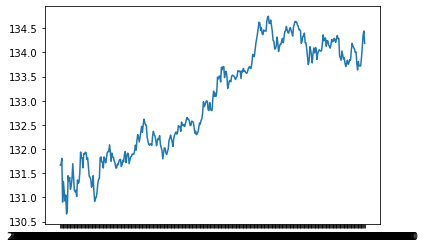

In [140]:
# Plots
import matplotlib.pyplot as plt

# Time and price
plt.plot(apple202009['Local_Date_Time'], apple202009['Close'])
plt.show()

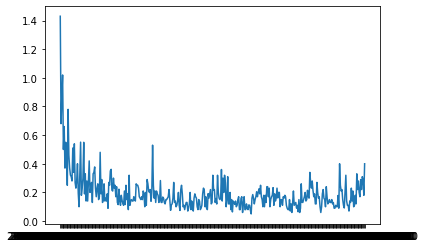

In [141]:
# Time and volatility (difference between high and low)
plt.plot(apple202009['Local_Date_Time'], apple202009['Diff_HL'])
plt.show()